In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
behave_db = pd.read_excel("QVI_transaction_data.xlsx")

In [6]:
behave_db.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
trans_db = pd.read_csv("QVI_purchase_behaviour.csv")

In [8]:
trans_db.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
print(behave_db.shape)
print(trans_db.shape)

(264836, 8)
(72637, 3)


In [10]:
print(behave_db.isnull().sum())
print('\r')
print(trans_db.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


<b>There is zero null value in the dataset.</b>

In [11]:
behave_db.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [13]:
trans_db.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [14]:
db = pd.merge(behave_db, trans_db, on="LYLTY_CARD_NBR", how="right")
db.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


<b>here, i have merged both the datasets on the basis of Loyalty Card Number pf the customer.</b>

In [15]:
db['DATE'] = pd.to_datetime(db['DATE'], unit='D', origin='1899-12-30')

<b>The DATE column was in int data type, we changed it into datetime datatype.</b>

In [16]:
db.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [17]:
behave_db.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   STORE_NBR         264836 non-null  int64         
 2   LYLTY_CARD_NBR    264836 non-null  int64         
 3   TXN_ID            264836 non-null  int64         
 4   PROD_NBR          264836 non-null  int64         
 5   PROD_NAME         264836 non-null  object        
 6   PROD_QTY          264836 non-null  int64         
 7   TOT_SALES         264836 non-null  float64       
 8   LIFESTAGE         264836 non-null  object        
 9   PREMIUM_CUSTOMER  264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


<b>First, let's identify the product with the highest demanad.<b/>

In [21]:
db['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [23]:
split_prods = db["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

In [24]:
word_count = {}

def count_words(line):
    for word in line:
        if word not in word_count:
            word_count[word] = 1
        else:
            word_count[word] += 1
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_count).sort_values(ascending=False))

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


<b>We need to remove salsa product</b>

In [26]:
db = db[~db['PROD_NAME'].str.contains(r"[Ss]alsa")]

In [27]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246742 non-null  datetime64[ns]
 1   STORE_NBR         246742 non-null  int64         
 2   LYLTY_CARD_NBR    246742 non-null  int64         
 3   TXN_ID            246742 non-null  int64         
 4   PROD_NBR          246742 non-null  int64         
 5   PROD_NAME         246742 non-null  object        
 6   PROD_QTY          246742 non-null  int64         
 7   TOT_SALES         246742 non-null  float64       
 8   LIFESTAGE         246742 non-null  object        
 9   PREMIUM_CUSTOMER  246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.7+ MB


In [30]:
print('min qty:',db['PROD_QTY'].min())
print('max qty:',db['PROD_QTY'].max())

min qty: 1
max qty: 200


In [31]:
db["PROD_QTY"].value_counts(bins=5).sort_index()

(0.8, 40.8]       246740
(40.8, 80.6]           0
(80.6, 120.4]          0
(120.4, 160.2]         0
(160.2, 200.0]         2
Name: PROD_QTY, dtype: int64

<b>from this binning we identify that PROD_QTY values below 40.8</b>

In [22]:
db.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
71457,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
71456,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
171902,2018-08-19,23,23102,19371,26,Pringles Sweet&Spcy BBQ 134g,5,18.5,RETIREES,Premium
151907,2019-05-20,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,RETIREES,Mainstream
17163,2019-05-16,57,57237,52658,82,Smith Crinkle Cut Mac N Cheese 150g,5,13.0,MIDAGE SINGLES/COUPLES,Premium


<b>Dorito Corn Chip Supreme 380g is brought in large quantity by the same customer. This is a outlier with respect to other values in the dataset and can be removed</b>

In [33]:
db = db[db["PROD_QTY"] < 6]

In [34]:
db['DATE'].describe()

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [36]:
pd.date_range(start=db['DATE'].min(), end = db['DATE'].max()).difference(db["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

<b>we got to know that the missing date was 2018-12-25.</b>

In [37]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=db["DATE"].min(), end=db["DATE"].max()), name="DATE"), db, on="DATE", how="left")

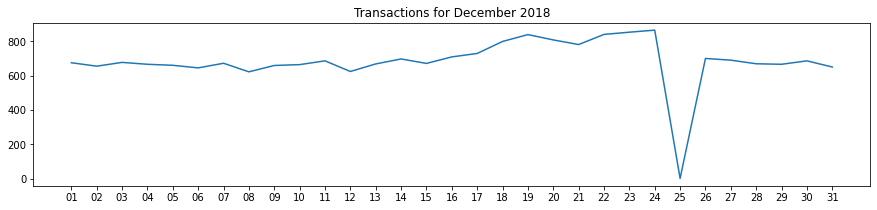

In [39]:
import datetime as dt
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= dt.datetime(2018,12,1)) & (trans_by_date.index < dt.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("Transactions for December 2018")
plt.savefig("Transactions for December 2018.png", bbox_inches="tight")
plt.show()

<b>The date with no transactions is 25th of Dec which is Christmas Day. So it's understood that the store remained closed. </b>

In [40]:
db["PROD_NAME"] = db["PROD_NAME"].str.replace(r'[0-9]+(G)','g')

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


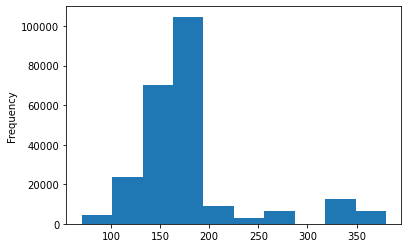

In [41]:
pack_sizes = db["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())
pack_sizes.plot.hist()

<b>The smallest package is 70g and the biggest package is 380g. Most packages are mid ranged from 150g to 200g </b>

In [42]:
db["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

<b>Here, we can see that some same product brands are written differently. Dorito and Doritos. Grain and GrnWves. Infuzions and Infzns. Natural and NCC. Red and RRD. Smith and Smiths. Snbts and Sunbites. WW and Woolworths</b>

In [43]:
db['PROD_NAME'].str.split()[db['PROD_NAME'].str.split().str[0]=='Grain'].value_counts()

[Grain, Waves, Sweet, Chilli, 210g]      3167
[Grain, Waves, Sour, Cream&Chives, g]    3105
Name: PROD_NAME, dtype: int64

In [44]:
db['PROD_NAME'].str.split()[db['PROD_NAME'].str.split().str[0]=='Natural'].value_counts()

[Natural, Chip, Co, Tmato, Hrb&Spce, 175g]       1572
[Natural, ChipCo, Sea, Salt, &, Vinegr, 175g]    1550
[Natural, Chip, Compny, SeaSalt175g]             1468
[Natural, ChipCo, Hony, Soy, Chckn175g]          1460
Name: PROD_NAME, dtype: int64

In [45]:
db['PROD_NAME'].str.split()[db['PROD_NAME'].str.split().str[0]=='Red'].value_counts()

[Red, Rock, Deli, Sp, Salt, &, Truffle, g]      1498
[Red, Rock, Deli, Thai, Chilli&Lime, 150g]      1495
[Red, Rock, Deli, Chikn&Garlic, Aioli, 150g]    1434
Name: PROD_NAME, dtype: int64

In [47]:
db["Cleaned_Brand_Names"] = db["PROD_NAME"].str.split().str[0]

In [48]:
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [51]:
db["Cleaned_Brand_Names"] = db.apply(lambda line: clean_brand_names(line), axis=1)

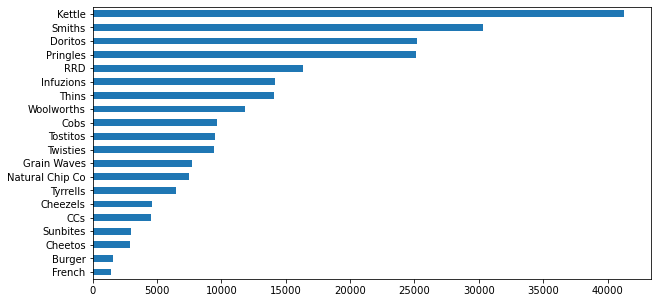

In [50]:
db["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(10,5))

<b>Brands with higest transactions are Kettle, Smiths, Doritos, Pringles</b>

In [52]:
db['LIFESTAGE'].value_counts()

OLDER SINGLES/COUPLES     50793
RETIREES                  46431
OLDER FAMILIES            45158
YOUNG FAMILIES            40494
YOUNG SINGLES/COUPLES     33969
MIDAGE SINGLES/COUPLES    23398
NEW FAMILIES               6497
Name: LIFESTAGE, dtype: int64

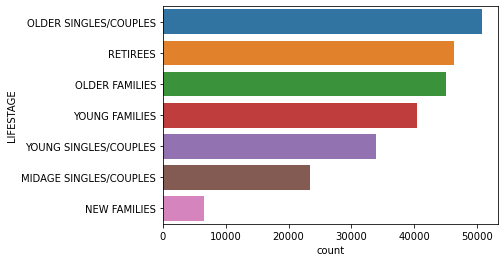

In [39]:
sns.countplot(y = db['LIFESTAGE'], order = db['LIFESTAGE'].value_counts().index)

In [54]:
grouped_sales = pd.DataFrame(db.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

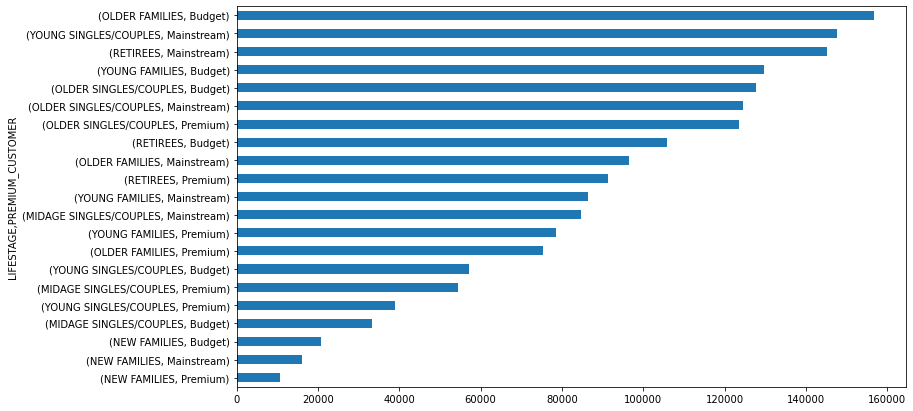

In [55]:
grouped_sales["sum"].sort_values().plot.barh(figsize=(12,7))

In [60]:
stage_agg_prem = db.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


In [58]:
unique_cust = db.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

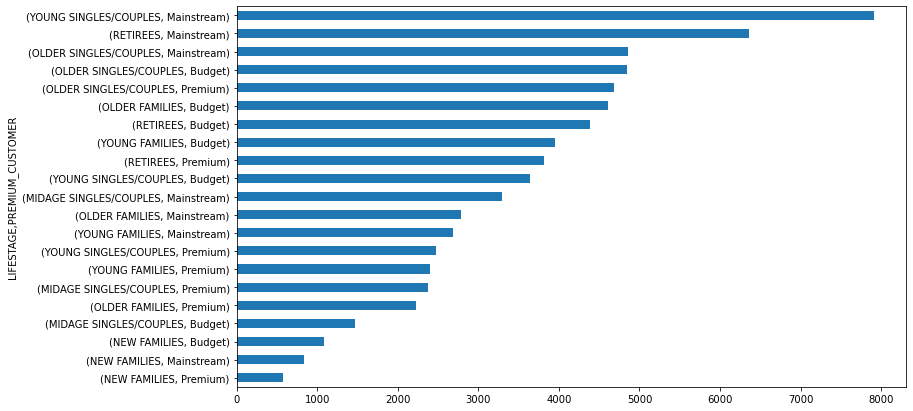

In [59]:
unique_cust.sort_values().plot.barh(figsize=(12,7))

In [62]:

freq_per_cust = db.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

<b>This describes the Average frequency of Purchase per segment" and "Unique customer per segment"</b>

<b>We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:<br>

 - High Frequency of Purchase and,<br>
 - Fairly high unique number of customer in the segment</b>

In [63]:
db.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: Cleaned_Brand_Names, dtype: int64


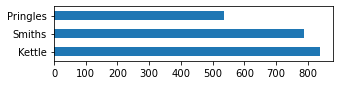

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: Cleaned_Brand_Names, dtype: int64


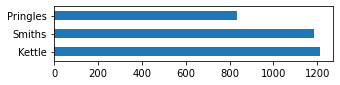

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: Cleaned_Brand_Names, dtype: int64


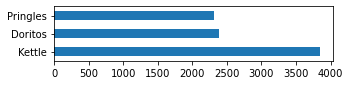

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: Cleaned_Brand_Names, dtype: int64


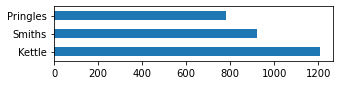

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: Cleaned_Brand_Names, dtype: int64


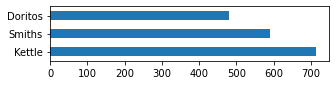

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: Cleaned_Brand_Names, dtype: int64


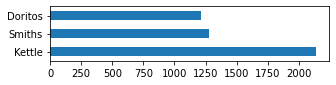

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: Cleaned_Brand_Names, dtype: int64


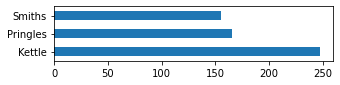

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: Cleaned_Brand_Names, dtype: int64


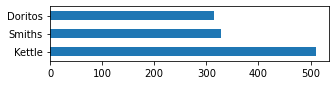

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: Cleaned_Brand_Names, dtype: int64


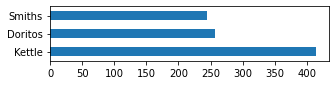

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: Cleaned_Brand_Names, dtype: int64


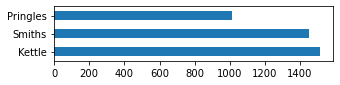

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: Cleaned_Brand_Names, dtype: int64


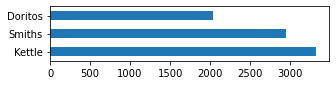

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: Cleaned_Brand_Names, dtype: int64


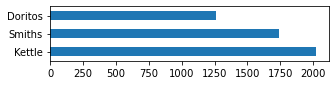

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: Cleaned_Brand_Names, dtype: int64


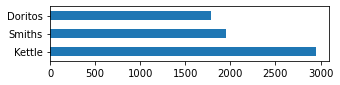

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: Cleaned_Brand_Names, dtype: int64


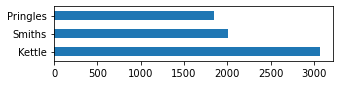

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: Cleaned_Brand_Names, dtype: int64


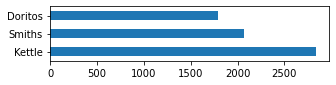

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: Cleaned_Brand_Names, dtype: int64


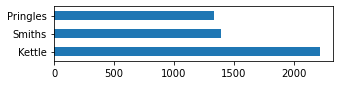

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: Cleaned_Brand_Names, dtype: int64


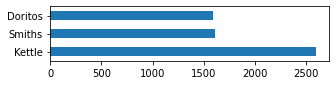

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: Cleaned_Brand_Names, dtype: int64


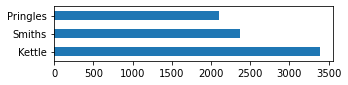

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: Cleaned_Brand_Names, dtype: int64


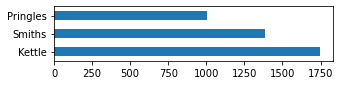

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: Cleaned_Brand_Names, dtype: int64


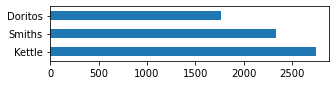

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: Cleaned_Brand_Names, dtype: int64


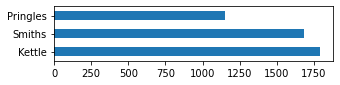

In [64]:
for stage in db["LIFESTAGE"].unique():
    for prem in db["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = db[(db["LIFESTAGE"] == stage) & (db["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

<b>
Every segment had Kettle as the most purchased brand. Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand. "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand</b>

<b>Top 3 total sales contributor segments are:<br>
 - Older Families(Budget)
 - Young Singles/Couples (Mainstream)
 - Retirees (Mainstream)</b>

<b>Older Families followed by Young Families has the highest average quantity of chips bought per purchase</b>

<b>Chips brand Kettle is dominating every segment as the most purchased brand.<br></b>

<b>Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).<br></b>

<b>Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.<br></b>